# Introduction to Simple Linear Regression in Python
---

Linear regression allows us to model the relationship between vraiables. This might allow us to predict a future outcome if we already know some information, or give us an insight into what is needed to reach a goal.

We need one dependent variable, which we will st udy the changes of as one or more independent variables are changed. For example, we could model how many goals are scored (dependent variable) as more shots are taken (independent variable). As we have just one independent variable, this is a simple linear regression. Models that take in multiple independent variables are known as multiple linear regressions.

We will apply a simple linear regression model to squad value data against performance in the Premier League. This might help us to see how much a squad might need to invest to avoid relegation, qualify for European competitions, or to create a data-driven target for our team.

We will take a quick look of our dataset, create the model, and then make some assessments on the back of it. Then, we'll calculate a better metric to improve our model. We will use the `sklearn` model to make this much less intimidating.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# load data
data = pd.read_csv('../csv/PositionsvsValue.csv')
data.head()

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8


In [3]:
data.describe()

,Season,Squad,Average Age,Non-Homegrown,Squad Value,GD,Points,Position
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2013.000000,36.304545,24.793636,22.886364,225.792909,0.000000,52.245455,10.500000
std,3.169489,5.410372,1.136427,5.377171,183.079602,27.061405,17.569788,5.779431
min,2008.000000,21.000000,21.300000,8.000000,22.500000,-54.000000,16.000000,1.000000
25%,2010.000000,33.000000,23.975000,19.000000,99.662500,-20.000000,40.000000,5.750000
50%,2013.000000,36.000000,24.800000,22.000000,158.275000,-7.000000,47.000000,10.500000
75%,2016.000000,40.000000,25.500000,26.000000,299.782500,20.250000,64.250000,15.250000
max,2018.000000,54.000000,28.100000,41.000000,1000.100000,79.000000,100.000000,20.000000


So now we have a 220-row dataset, which each row being a team in each Premier League season since 2008/09. For each of the teams, we get squad sizes, ages, and squad value (in Euros) as well as performance data with goal difference, points, and position.

Our aim is to get a model together that would help us predict a team's points based on their squad value. Before we do that, we should see what relationships are among some of the key variables. We can do that visually with a pair plot.

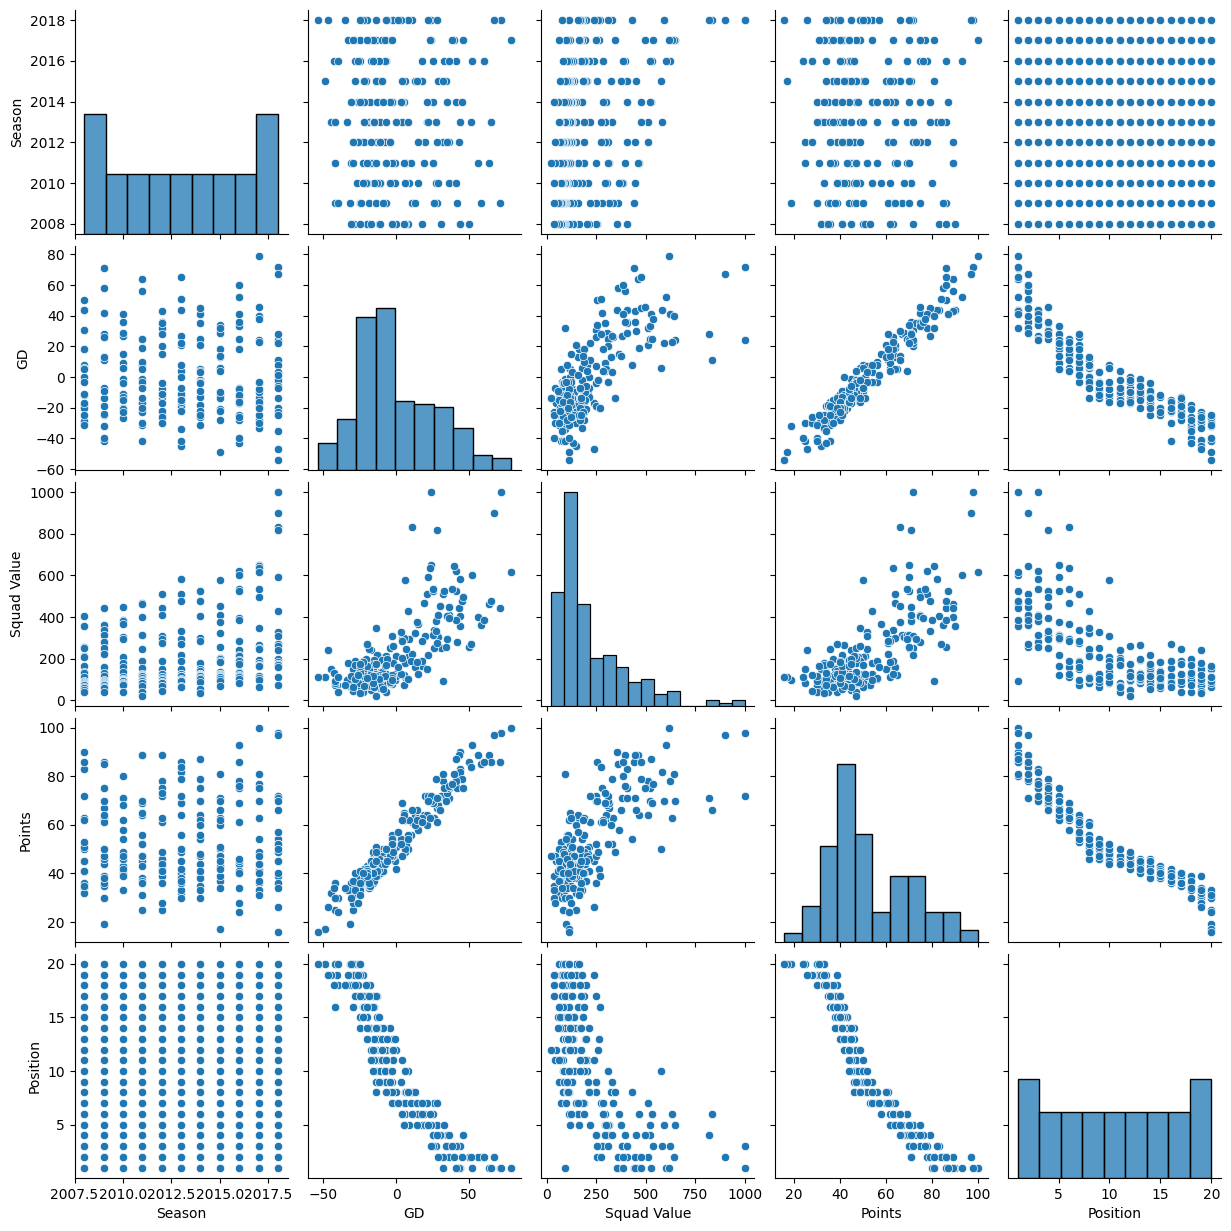

In [4]:
sns.pairplot(data[['Season', 'GD', 'Squad Value', 'Points', 'Position']])

Some interesting points to keep in mind:

- Points and goal difference correlate really strongly, as you would expect.
- Squad value goes up as goal difference and points go up, but as more of a curve tha a line.
- Squad value has increased over time (we'll come back to this)

Thinking back to our initial problem - modelling squad value on performance - we need to define what performance is. I think that we can answer this by seeing which of points and position correlate more with squad value.

In [5]:
abs(data['Squad Value'].corr(data['Position'])) > data['Squad Value'].corr(data['Points'])

False

Points seem to correlate more than position, so we will build our model around how many points you should expect from your squad value.

## Building our model

1. Get and reshape the two columns that we want to use in our model: Points and squad value
2. Split each of the two variables into a training set and a test set. The train set will build our model, the test set will allow us to see how good the model is.
3. Create an empty linear regression model, then fit it against our two training sets.
4. Examine and test the model

In [6]:
#1 - Get our two columns into variables, then reshape them

x = data['Squad Value']
y = data['Points']

x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

We can use `train_test_split` to easily create our training and test sets. There are a few arguments we have to pass, in addition to the variables that will be split. There is `test_size`, which tells the function what % of the split should be in the test side. `Random_state` is not necessary, but it sets a starting point for the random number generation involved in the split.

In [7]:
#2 - use train_test_split to create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

Next is creating the empty model, then fitting it with our training data. The `sklearn` package means that this only takes a couple of lines.

In [8]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

The final part is examining the model. This means seeing what conclusions it gives to answer our main question (value -> performance), and importantly, how valid they are.

We can start by checking the coefficient. This is the amount that we expect our response variable (points) to change for every unit that our predictor variable changes (squad vaine in m Euros). Simply, for every extra million we put into our squad value, how many extra points should we get? We find out with the `.coef_` method of the model.

In [9]:
print(lm.coef_)

[[0.07152655]]


On average, an extra million gets you 0.07 points.

We now need to test the model by checking predictions from the trained model against the test data that we know is true. Let's check a few ways of doing this. Firstly, we'll create some predictions using `lm.predict` - we'll feed it the real squad value data, and it will predict the points based on the model. Then we'll use this in 2 charts, firstly plotting the real data against the prediction line, then plotting the prediction against the true data.

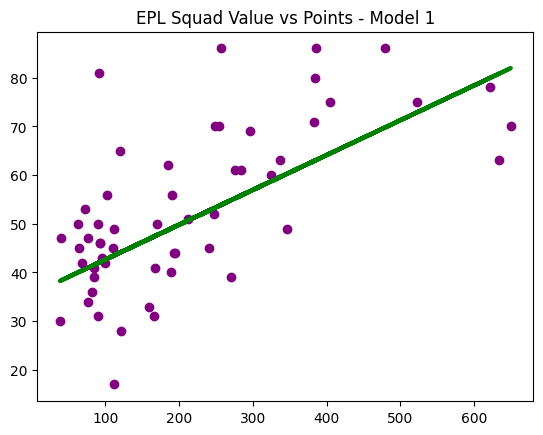

In [10]:
predictions = lm.predict(x_test)

plt.scatter(x_test, y_test, color='purple')
plt.plot(x_test, predictions, color='green', linewidth=3)
plt.title('EPL Squad Value vs Points - Model 1')

plt.show()

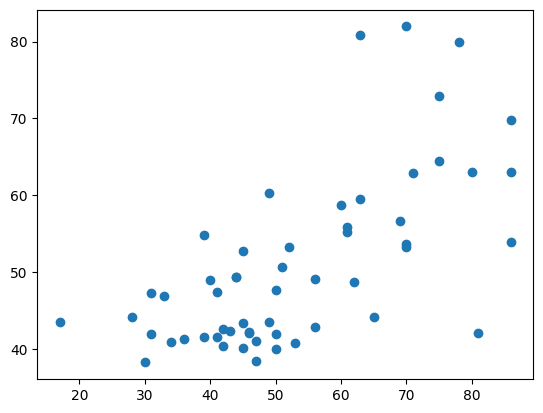

In [11]:
plt.scatter(y_test, predictions)

Lots of values that match up well, but lots that don't. Let's get a histogram to plot the differences between the predictions and the true data.

/tmp/ipykernel_1874/2761554610.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins=50, color='purple')


<AxesSubplot: title={'center': 'How many points out is each prediction?'}, ylabel='Density'>

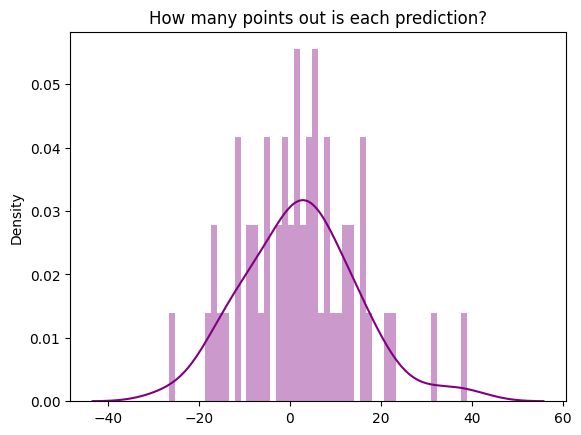

In [17]:
plt.title('How many points out is each prediction?')
sns.distplot((y_test-predictions), bins=50, color='purple')
# sns.histplot((y_test-predictions), kde=True)

A few were way out, like 30-40 points out. Mostly we are within 10 points or so either way.

Let's improve this using a comparison metric called 'mean absolute error'. This is simply the average difference between the prediction and the truth.

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

Mean Absolute Error: 9.728206663986414


Alternatively, we could put these in a table, rather than plot them. But that is a bit less friendly to work through.

In [19]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df.head()

,Actual,Predicted
0,47,40.995974
1,56,42.834207
2,49,43.510133
3,63,80.843418
4,61,55.204724


In [20]:
df['Actual'].corr(df['Predicted'])

0.6540205213240835

## Improving the model

When we took an exploratory look at the data, we found that team values had increased over seasons. As such, comparing a 100m squad in 2008 to a 100m squad in 2018 probably isn't fair.

To counter this, we are going to create a new 'Relative Value' column. This will take each team in a season, and divide it by the highest value in that league. These values will be between 0 & 1 and give a better impression of comparative buying power, hence performance in the league. Hopefully it will provide for a better model than the example above.

In [21]:
# Blank list
relative_value = []

# loop through each row
for index, team in data.iterrows():
  # obtain which season we are looking at
  season = team['Season']

  # create a new dataframe with just this season
  teamseason = data[data['Season'] == season]

  # find the max value
  maxvalue = teamseason['Squad Value'].max()

  # divide this row's value by the max value for the season
  temp_relative_value = team['Squad Value'] / maxvalue

  # append it to our list
  relative_value.append(temp_relative_value)

#Add list to new column in main dataframe
data['Relative Value'] = relative_value
data.head()

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position,Relative Value
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3,1.000000
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1,0.875584
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2,0.632481
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4,0.616794
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8,0.522744


Let's get a pairplot to check out the new column's relationship with the others.

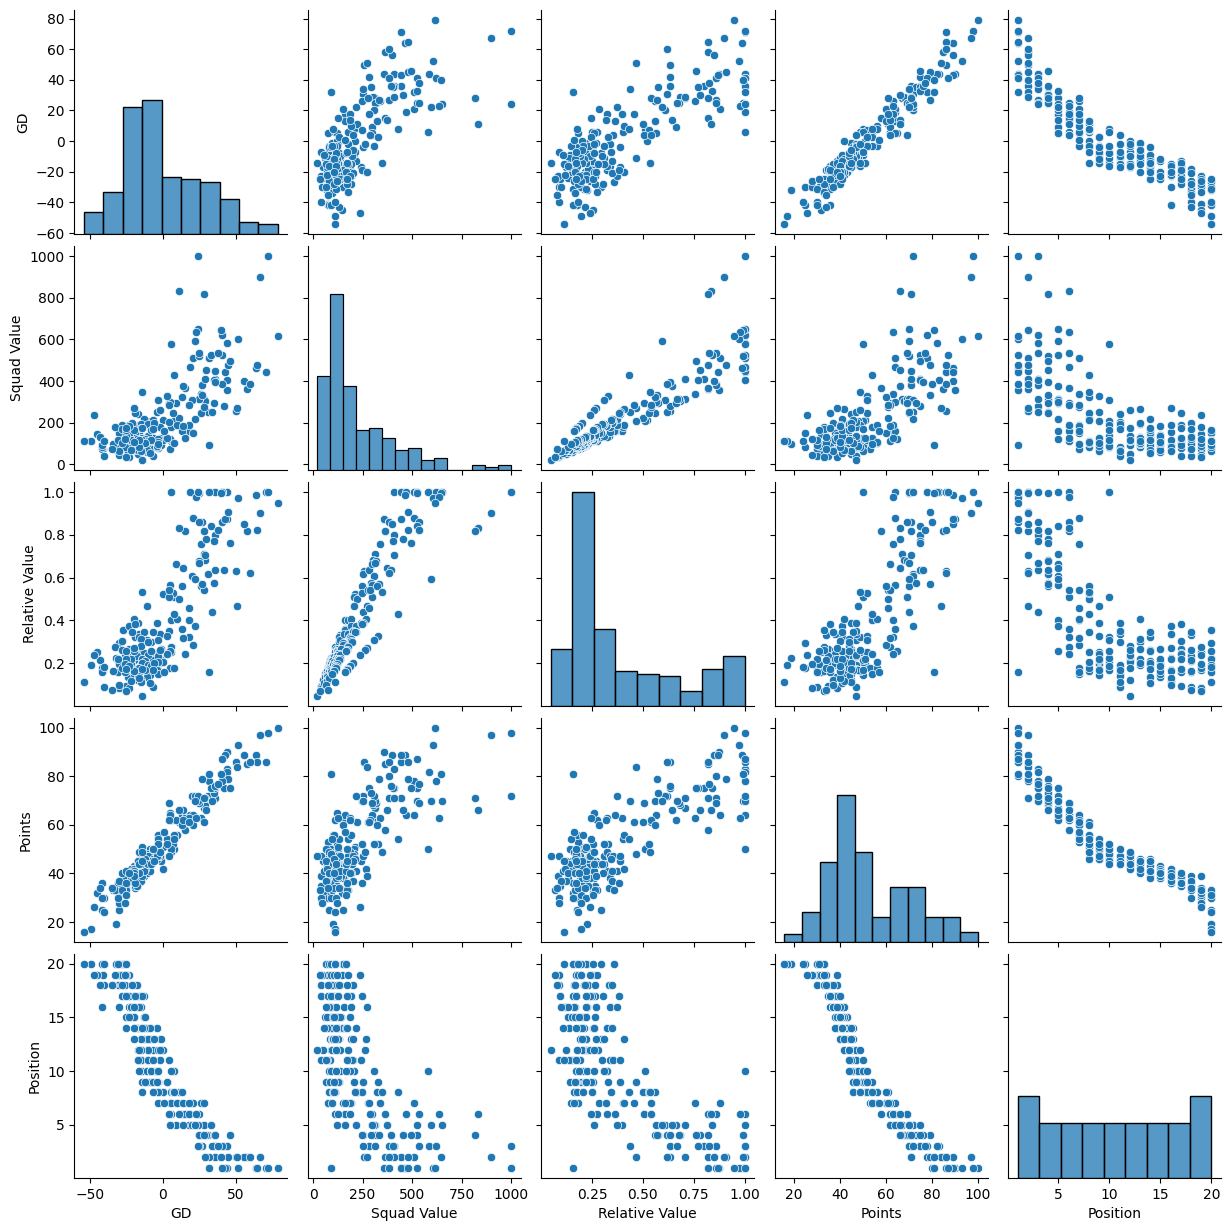

In [22]:
sns.pairplot(data[['GD', 'Squad Value', 'Relative Value', 'Points', 'Position']])

Looks quite similiar to the squad value relationships in many parts, but looks to have a stronger correlation with points and goal difference. Hopefully this will give us a more accurate model. Let's create a new one in the same way as above.

In [23]:
# assign relevant columns to variables and reshape them

x = data['Relative Value']
y = data['Points']
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# create training and test sets for each of the two variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

# create an empty model, then train it against the variables
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

We'll again look at the coefficient to see what our model tells us to expect. We'll divide it by 10, to see how many points increasing our squad value by 10% of the most expensive team should earn.

In [25]:
print(lm.coef_/10)

[[5.31884201]]


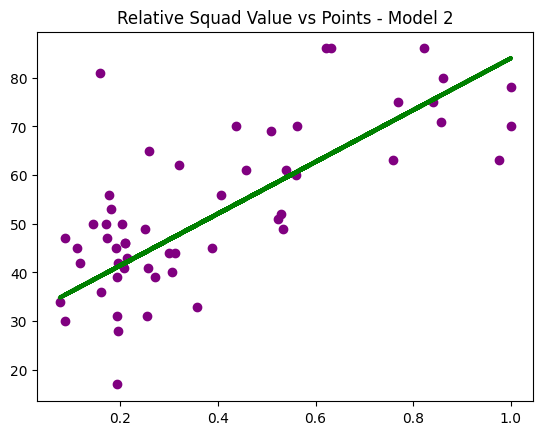

In [27]:
predictions = lm.predict(x_test)
plt.scatter(x_test, y_test, color='purple')
plt.plot(x_test, predictions, color='green', linewidth=3)
plt.title('Relative Squad Value vs Points - Model 2')
plt.show()

The model predicts just over 5 points. This seems to make sense, as the difference between top and bottom would often range around 53 points or so.

So for every 10% that you are off the most expensive team, our model suggets that you should expect to drop 5.3 points.

Let's run the same tests as before to check out whether or not this new model performs better. Firstly, the same two charts - the scatter plot & the distribution of the errors. The scatter plto looks to have more of a correlation and the distribution is also a bit tighter, with fewer big errors.

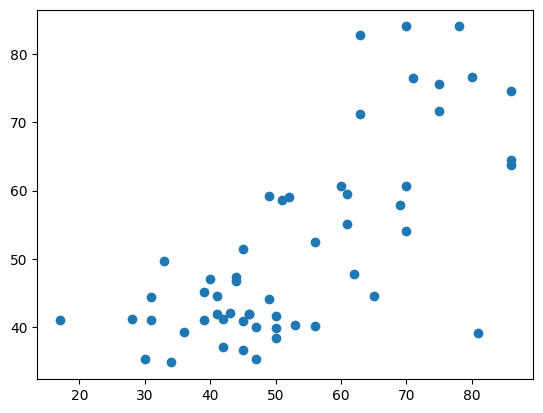

In [28]:
plt.scatter(y_test, predictions)

/tmp/ipykernel_1874/3978887583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins=50, color='purple')


<AxesSubplot: title={'center': 'How many poitns out is each prediction?'}, ylabel='Density'>

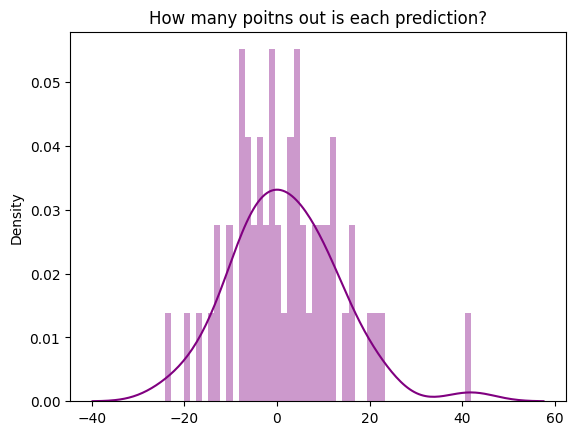

In [29]:
plt.title('How many poitns out is each prediction?')
sns.distplot((y_test-predictions), bins=50, color='purple')

To back up the eye test, we'll use our mean absolute error metric - the average difference between the prediction and the truth. Our previous mewtric wasa 9.7.

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 8.972066563663786


That's nearly an 8% improvement. Not a gamechanger, but this model does make more sense than the one before. Not only does it fit better (correlation between predictions/reality also increased significantly), but we know from our own knowledge of football that transfer fees and market values have hugely inflated over the length of our dataset.

There are other oddities that you will have noticed, such as the extreme outliers (Leicetser 15/16, Chelsea 15/16, Chelsea 18/19), the cluster of teams aroudn the relegation places. All of these could do with their own futher analysis.